# Project 2

In [1]:
# Imports:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.linear_model import ElasticNetCV

import math

# Reading in Data & Counting missing/null values

In [2]:
# the dataset is contained in the `datasets` folder
# Read in Datasets
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [3]:
# shows all columns
# https://stackoverflow.com/questions/66109829/pandas-df-isna-sum-not-showing-all-column-names

pd.set_option('display.max_rows',None)

In [4]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [5]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [6]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [7]:
train.isna().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [8]:
test.isna().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              820
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

# EDA

C:\Users\tu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


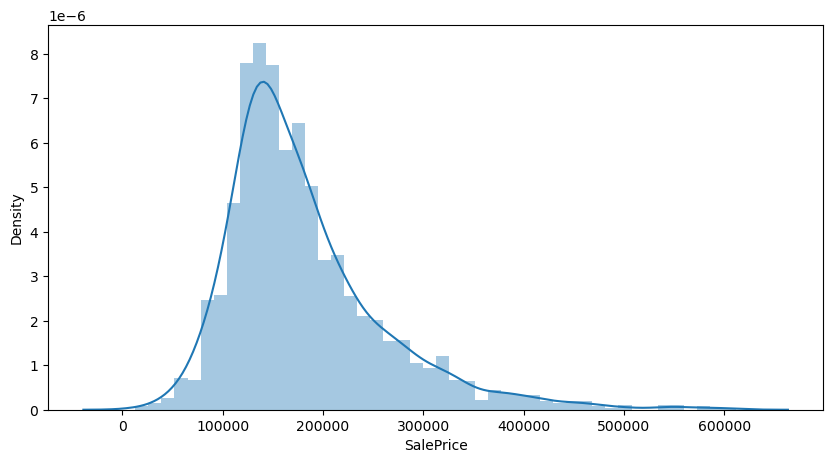

In [9]:
# Distribution Chart that shows sales are RIGHT skewed. 

plt.figure(figsize=(10,5))
sns.distplot(train['SalePrice'])
plt.show()

In [10]:
# Chart that shows missing values in Train Dataset
temp = list(train.isna().sum())

#then we create a list of columns and their missing values as inner list to a separate list
lst= []
i = 0
for col in train.columns:
    insert_lst = [col,temp[i]]
    lst.append(insert_lst)
    i+=1

#finally create a dataframe
temp_df = pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])

temp_df[temp_df['Missing_Values']>0].sort_values(by='Missing_Values',
                                                 ascending=False).reset_index(drop=True).style.background_gradient(cmap='Blues')

,Column_Name,Missing_Values
0,Pool QC,2042
1,Misc Feature,1986
2,Alley,1911
3,Fence,1651
4,Fireplace Qu,1000
5,Lot Frontage,330
6,Garage Yr Blt,114
7,Garage Cond,114
8,Garage Qual,114
9,Garage Finish,114


In [11]:
temp2 = list(test.isna().sum())

#then we create a list of columns and their missing values as inner list to a separate list
lst2= []
i2 = 0
for col in test.columns:
    insert_lst = [col, temp2[i2]]
    lst2.append(insert_lst)
    i2+=1

#finally create a dataframe
temp_df2 = pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])

temp_df2[temp_df2['Missing_Values']>0].sort_values(by='Missing_Values',
                                                 ascending=False).reset_index(drop=True).style.background_gradient(cmap='Blues')

,Column_Name,Missing_Values
0,Pool QC,2042
1,Misc Feature,1986
2,Alley,1911
3,Fence,1651
4,Fireplace Qu,1000
5,Lot Frontage,330
6,Garage Yr Blt,114
7,Garage Cond,114
8,Garage Qual,114
9,Garage Finish,114


# Identify Outliers

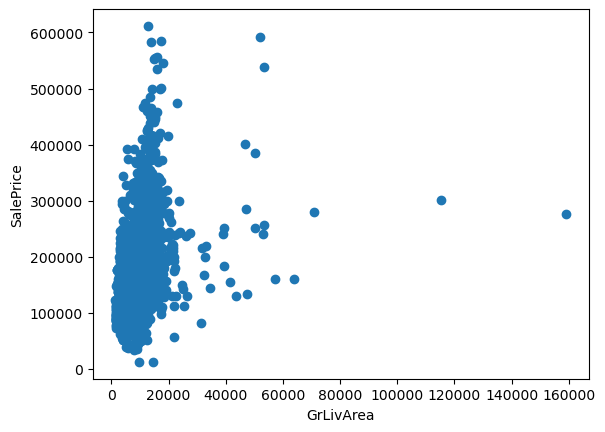

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = train['Lot Area'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

In [13]:
# Remove the 2 weird outliers
## train = train.drop(train[(train['Gr Liv Area']>4000)].index)

# Heatmap Correlation 

<AxesSubplot:>

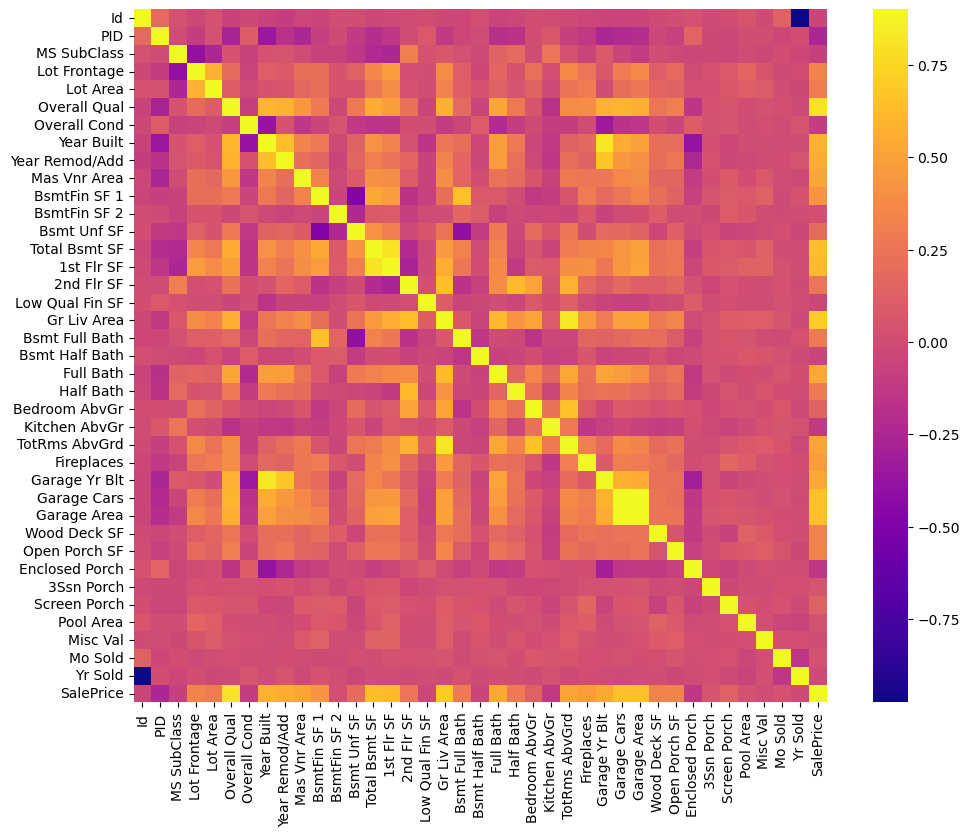

In [14]:
# Overall heatmap correlation

correlation = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(correlation, vmax=0.9, square=True, cmap="plasma")

<AxesSubplot:>

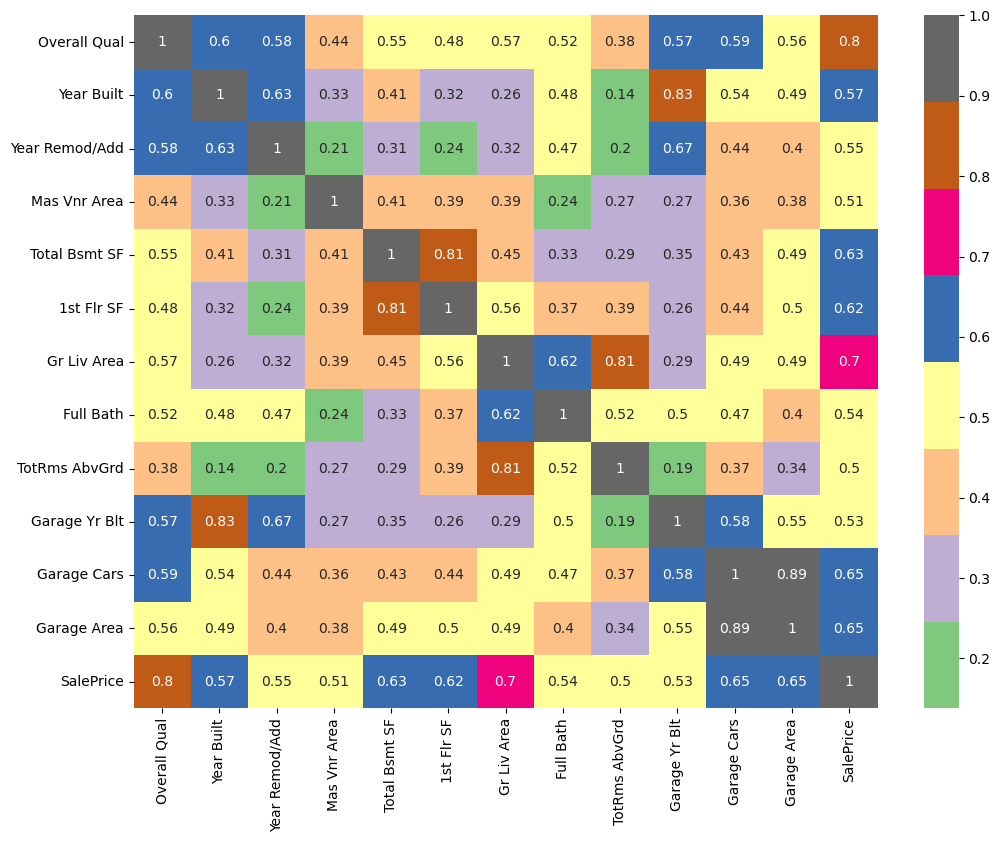

In [15]:
# more in depth heatmap correlation

top_corr_features = correlation.index[abs(correlation["SalePrice"]) > 0.5]
plt.subplots(figsize=(12,9))
sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="Accent")

# Dropping Useless Columns for cleaning

In [16]:
# Drop the useless columns, we need them for determining prediction

train.drop(['PID'], axis=1, inplace = True)
test.drop(['PID'], axis=1, inplace = True)

In [17]:
# Convert Spaces to Underscores & underscore for Train
train.columns = [x.lower().replace(' ','_') for x in train.columns]

In [18]:
# Convert Spaces to Underscores & underscore for Test
test.columns = [x.lower().replace(' ','_') for x in test.columns]

In [19]:
# Combining both data frames
# total_data = pd.concat([train, test], axis = 0).reset_index(drop=True)
total_data = train

# Changing Data Types

In [20]:
# Convert MS Subclass to string
total_data['ms_subclass'] = total_data['ms_subclass'].astype(str)

In [21]:
test['ms_subclass'] = test['ms_subclass'].astype(str)

In [22]:
# Convert Central Air to int
total_data['central_air'] = (total_data['central_air'] == 'Y').astype(int)

In [23]:
# Convert Central Air to int
test['central_air'] = (test['central_air'] == 'Y').astype(int)
test['central_air'].value_counts()

1    823
0     55
Name: central_air, dtype: int64

# Filling in missing values

In [24]:
# Read each missing data that is a string and means something
# total_data.isna().sum()

In [25]:
# test.isna().sum()

In [26]:
# Columns in train & test that are NON-Numeric & NA means something

known_list = [
    'alley',
    'mas_vnr_type',
    'bsmt_qual',
    'bsmt_cond',
    'bsmt_exposure',
    'bsmtfin_type_1',
    'bsmtfin_type_2',
    'fireplace_qu',
    'garage_type',
    'garage_finish',
    'garage_qual',
    'garage_cond',
    'pool_qc',
    'fence',
    'misc_feature',    
]

In [27]:
# fill in the rest integers with ZERO
# RECLEANED DATA, filled integers with something else
for column in known_list:
    total_data[column].fillna('None', inplace = True)

In [28]:
for column in known_list:
    test[column].fillna('None', inplace = True)

In [29]:
# electrical missing values mean nothing, filling them with mode values
total_data['electrical'] = total_data['electrical'].fillna(total_data['electrical'].mode()[0])

In [30]:
test['electrical'] = test['electrical'].fillna(test['electrical'].mode()[0])

# Filling in missing num data with sklearn simple imputer:

In [31]:
# https://www.geeksforgeeks.org/ml-handle-missing-data-with-simple-imputer/
# Create a function that takes in dataframe, and target, then returns new dataframe with filled nums
from sklearn.neighbors import KNeighborsRegressor

def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

In [32]:
# List of numeric columns
for column in [
    'lot_frontage',
    'mas_vnr_area',
    'bsmtfin_sf_1',
    'bsmtfin_sf_2',
    'bsmt_unf_sf',
    'total_bsmt_sf',
    'bsmt_full_bath',
    'bsmt_half_bath',
    'garage_yr_blt',
    'garage_cars',
    'garage_area'
]: 
    total_data = knn_impute(total_data, column)

In [33]:
test['garage_yr_blt'] = test['garage_yr_blt'].fillna(test['garage_yr_blt'].mean())

In [34]:
test['lot_frontage'] = test['lot_frontage'].fillna(test['lot_frontage'].mean())

In [35]:
test['mas_vnr_area'] = test['mas_vnr_area'].fillna(test['mas_vnr_area'].mean())

# Feature Selection

In [36]:
total_data['total_bathrooms'] = (total_data['full_bath'] + (0.5 * total_data['half_bath']) +
                               total_data['bsmt_full_bath'] + (0.5 * total_data['bsmt_half_bath']))

In [37]:
test['total_bathrooms'] = (test['full_bath'] + (0.5 * test['half_bath']) +
                               test['bsmt_full_bath'] + (0.5 * test['bsmt_half_bath']))

In [38]:
total_data['total_home_quality'] = total_data['overall_qual'] + total_data['overall_cond']

In [39]:
test['total_home_quality'] = test['overall_qual'] + test['overall_cond']

In [40]:
# Create Dummies for Categoricals
total_data_dummy = pd.get_dummies(total_data)

In [41]:
total_data_dummy.columns

Index(['id', 'lot_frontage', 'lot_area', 'overall_qual', 'overall_cond',
       'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1',
       'bsmtfin_sf_2',
       ...
       'misc_feature_TenC', 'sale_type_COD', 'sale_type_CWD', 'sale_type_Con',
       'sale_type_ConLD', 'sale_type_ConLI', 'sale_type_ConLw',
       'sale_type_New', 'sale_type_Oth', 'sale_type_WD '],
      dtype='object', length=321)

In [42]:
test_dummy = pd.get_dummies(test)

In [43]:
test_dummy.shape

(878, 300)

In [44]:
total_data_dummy.shape

(2051, 321)

In [45]:
# List of columns in train.csv but NOT in test.csv

train_column_nottest = list(set(total_data_dummy.columns) - set(test_dummy.columns))

In [46]:
# List of columns in test.csv but NOT in train.csv

test_column_nottrain = list(set(test.columns) - set(total_data_dummy.columns))

# Train Test Split

In [47]:
X = total_data_dummy.drop(columns = train_column_nottest)
y = total_data_dummy['saleprice']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023)

# Scale Data

In [49]:
scaler = StandardScaler()
# scaler.fit(X_train)
# No need for this because i have it in one line!

In [50]:
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.transform(X_test)

# Linear Regression

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(X_train_ss, y_train)

LinearRegression()

In [53]:
total_data_dummy.shape

(2051, 321)

In [54]:
# Take a peek at the model coefficient and intercept
print(lr.intercept_)

182029.77768950613


In [68]:
print(lr.coef_)
print(X_test.columns)

[ 4.09253743e+03  1.74594324e+03  6.62984960e+03 -3.72051913e+15
 -2.95224427e+15  1.16556316e+04  2.16271283e+03  4.73191413e+03
 -1.01400006e+15 -3.57061334e+14 -1.00743453e+15  9.83931383e+14
 -1.07606250e+03  6.74592591e+14  7.40807761e+14  9.58270699e+13
 -8.54512635e+14 -5.07755420e+14 -1.22264941e+14 -5.36833428e+14
 -2.47802080e+14 -3.61765430e+03 -1.02462500e+03  3.69930469e+03
  4.27831250e+03 -1.09735938e+03  3.36168750e+03  3.60156250e+03
  9.31359375e+02  7.53531250e+02  5.82109375e+02  4.00929688e+02
  3.70903125e+03 -2.67653750e+04 -7.44631250e+03 -5.80375000e+02
  3.65125000e+03  7.87040093e+14  4.55953976e+15  9.02901562e+03
  8.04431250e+03  2.07678125e+03  7.22993750e+03  2.42927734e+04
  1.25152500e+04  3.53171484e+03  5.14279688e+03  1.74013906e+04
  2.24493750e+04  1.44425625e+04  4.29609375e+03  7.67000000e+03
  5.97037500e+03  8.21899576e+14 -5.98761719e+02  4.78125000e+03
  4.28001437e+14  1.62207031e+03  5.63500000e+03  2.38682031e+03
 -1.18749743e+14 -1.18749

In [69]:
new_coef = (np.exp(lr.coef_) - 1) * 100 
new_coef

C:\Users\tu\AppData\Local\Temp\ipykernel_5032\2891505030.py:1: RuntimeWarning: overflow encountered in exp
  new_coef = (np.exp(lr.coef_) - 1) * 100


array([             inf,              inf,              inf,
       -1.00000000e+002, -1.00000000e+002,              inf,
                    inf,              inf, -1.00000000e+002,
       -1.00000000e+002, -1.00000000e+002,              inf,
       -1.00000000e+002,              inf,              inf,
                    inf, -1.00000000e+002, -1.00000000e+002,
       -1.00000000e+002, -1.00000000e+002, -1.00000000e+002,
       -1.00000000e+002, -1.00000000e+002,              inf,
                    inf, -1.00000000e+002,              inf,
                    inf,              inf,              inf,
        6.41046342e+254,  1.32297279e+176,              inf,
       -1.00000000e+002, -1.00000000e+002, -1.00000000e+002,
                    inf,              inf,              inf,
                    inf,              inf,              inf,
                    inf,              inf,              inf,
                    inf,              inf,              inf,
                    inf,

In [71]:
# Interpret the coefficients in order to understand 
coef1 = pd.DataFrame(zip(X_test.columns,np.exp(lr.coef_)), columns = ['features', 'coef'])
coef1
# list(zip(lstA, lstB))

C:\Users\tu\AppData\Local\Temp\ipykernel_5032\3342603894.py:2: RuntimeWarning: overflow encountered in exp
  coef1 = pd.DataFrame(zip(X_test.columns,np.exp(lr.coef_)), columns = ['features', 'coef'])


,features,coef
0,id,inf
1,lot_frontage,inf
2,lot_area,inf
3,overall_qual,0.000000e+00
4,overall_cond,0.000000e+00
5,year_built,inf
6,year_remod/add,inf
7,mas_vnr_area,inf
8,bsmtfin_sf_1,0.000000e+00
9,bsmtfin_sf_2,0.000000e+00


In [66]:
coef1['coefficients'] = coef1['coeff']

KeyError: 'coefficients'

In [67]:
coef1.sort_values(by = 'coefficients', ascending = True)
# For each increase in 'attribute', 'price' is set to increase by 'coeff'

# Log transform values to read coefficients into interpretable values.
# Ask tim on how to log transforms and 

KeyError: 'coefficients'

In [125]:
lr.score(X_train_ss, y_train)

# X, y train score 

0.9461985956103531

In [128]:
lr.score(X_test_ss, y_test)

-4.3501450572970295e+19

In [57]:
preds = lr.predict(test_dummy[X.columns])

# Ridge Regression

In [130]:
# Instantiate.
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(X_train_ss, y_train)

# Ridge preds
preds_ridge = ridge_model.predict(test_dummy[X.columns])

# Evaluate model using R2.
print(ridge_model.score(X_train_ss, y_train))
print(ridge_model.score(X_test_ss, y_test))

0.9436008837828705
0.7251295067895169


C:\Users\tu\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [133]:
print(ridge_model.coef_)

[-7.20399476e+00  5.02393194e+01  7.57813317e-01  4.34500849e+03
  3.25569349e+02  3.60749966e+02  9.33545747e+01  2.21063086e+01
  1.08742920e+01  1.54527996e+01 -4.65613350e+00  2.16709581e+01
 -2.82803040e+03  9.92826530e+00  1.99864128e+01  1.11167852e+00
  3.10263547e+01  2.42668687e+02 -6.28560756e+03  2.93350239e+03
  3.18385598e+03 -2.94012942e+03 -5.03003021e+03  1.48038248e+03
  4.50726083e+03 -3.81016437e+01  3.70786517e+03  1.99478286e+01
  9.11819563e+00 -3.94736793e+00  1.18183877e+01  2.27578915e+01
  6.97329202e+01  2.74954508e+01 -1.72931557e+01 -3.45797322e+02
 -4.79892784e+03  1.62529529e+03  4.67057784e+03 -3.72166340e+03
 -3.76029057e+03  8.99571994e+01  4.23899958e+02 -1.71104775e+03
  2.77922515e+03  1.73157581e+03  2.88723583e+03 -7.74310555e+02
 -5.07308077e+01  5.17130927e+03  3.37883029e+03 -3.37417730e+03
  4.17468807e+03 -2.89553756e+03 -5.76211381e+03  6.29786832e+03
 -4.77988776e+02  2.27551869e+03  1.13282005e+03 -4.20916312e+03
 -7.55607089e+02  7.55607

In [131]:
# Instantiate.
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(X_train, y_train)

# Ridge preds
preds_ridge = ridge_model.predict(test_dummy[X.columns])

# Evaluate model using R2.
print(ridge_model.score(X_train, y_train))
print(ridge_model.score(X_test, y_test))

0.9316969711857228
0.7784409211368675


In [59]:
# Reminders
print(" LR ".center(18, "="))
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
print()
print(" Ridge ".center(18, "="))
print(ridge_model.score(X_train, y_train))
print(ridge_model.score(X_test, y_test))

======= LR =======
0.9461986048529202
0.6147163362891986

===== Ridge ======
0.9316969711857228
0.7784409211368675


# Lasso Model

In [60]:
# Set up a list of Lasso alphas to check.
model_lasso = LassoCV(alphas = [25, 10, 5, 1, 0.1, .05, .01, 0.001]).fit(X_train, y_train)

# Lasso preds
y_pred = model_lasso.predict(test_dummy[X.columns])

# Cross-validate over our list of Lasso alphas.
# lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)

# Fit model using best ridge alpha!
# lasso_cv.fit(X_train, y_train);

C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277031309418.5687, tolerance: 784299755.882817
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9256475642.457458, tolerance: 784299755.882817
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232429605434.9454, tolerance: 784299755.882817
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarnin

C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 229730432122.6947, tolerance: 792168981.0098687
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214758762869.75378, tolerance: 792168981.0098687
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199102227448.32852, tolerance: 792168981.0098687
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceW

In [61]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [62]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 201 variables and eliminated the other 90 variables


In [63]:
print("The optimal value of alpha for Lasso Regression is: "
      , model_lasso.alpha_)

The optimal value of alpha for Lasso Regression is:  25.0


In [634]:
print(model_lasso.score(X_train, y_train))
print(model_lasso.score(X_test, y_test))

0.9384261649374445
0.7670325488790939


# Elastic Net

In [665]:
# Set up a list of alphas to check.
enet_alphas = np.linspace(0.5, 1.0, 100)

# Set up our l1 ratio. 
enet_ratio = 0.5

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(X_train, y_train)

# Generate predictions.
enet_model_preds = enet_model.predict(test_dummy[X.columns])

# Evaluate model.
print(enet_model.score(X_train, y_train))
print(enet_model.score(X_test, y_test))

C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 521162454144.4318, tolerance: 784299755.882817
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 520662128018.3065, tolerance: 784299755.882817
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 520159769226.27826, tolerance: 784299755.882817
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarni

C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 503518656484.4656, tolerance: 784299755.882817
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 502945098910.1206, tolerance: 784299755.882817
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 502369072141.9142, tolerance: 784299755.882817
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarnin

C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482503678068.3209, tolerance: 784299755.882817
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481833079331.45953, tolerance: 784299755.882817
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481159092041.2764, tolerance: 784299755.882817
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarni

C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 445662769226.85425, tolerance: 746067681.3521975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 445175307077.2123, tolerance: 746067681.3521975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 444685967949.28766, tolerance: 746067681.3521975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceW

C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 431280347731.4221, tolerance: 746067681.3521975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430737363372.8843, tolerance: 746067681.3521975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430192257368.7269, tolerance: 746067681.3521975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWar

C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 410648455302.0391, tolerance: 746067681.3521975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 410020101385.2101, tolerance: 746067681.3521975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 409389020727.18317, tolerance: 746067681.3521975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWa

C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391916033268.56744, tolerance: 746067681.3521975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391198079073.648, tolerance: 746067681.3521975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390476271739.6112, tolerance: 746067681.3521975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWar

C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 449288711646.4862, tolerance: 827470456.9751236
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448720371049.5055, tolerance: 827470456.9751236
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448149731839.47516, tolerance: 827470456.9751236
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWa

C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429892246557.76196, tolerance: 827470456.9751236
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429242659659.87317, tolerance: 827470456.9751236
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 428590192165.2114, tolerance: 827470456.9751236
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceW

C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 410514148267.4739, tolerance: 827470456.9751236
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 409771494103.65216, tolerance: 827470456.9751236
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 409024915795.8579, tolerance: 827470456.9751236
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWa

C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 519714278173.1128, tolerance: 812014846.1867918
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 519164062967.8517, tolerance: 812014846.1867918
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 518611608015.9279, tolerance: 812014846.1867918
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWar

C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 503414963120.62, tolerance: 812014846.1867918
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 502796299481.4222, tolerance: 812014846.1867918
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 502175000104.2022, tolerance: 812014846.1867918
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarni

C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484987785151.84686, tolerance: 812014846.1867918
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484283158417.4604, tolerance: 812014846.1867918
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 483574968814.2584, tolerance: 812014846.1867918
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWa

C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460416942940.5958, tolerance: 812014846.1867918
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 527051806750.931, tolerance: 792168981.0098687
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526526470263.2791, tolerance: 792168981.0098687
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarn

C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512100820684.4186, tolerance: 792168981.0098687
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511514925205.12085, tolerance: 792168981.0098687
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 510926593428.78613, tolerance: 792168981.0098687
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceW

C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 490694965150.208, tolerance: 792168981.0098687
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 490014214146.2793, tolerance: 792168981.0098687
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 489330185182.3541, tolerance: 792168981.0098687
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarn

C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 470253287664.89185, tolerance: 792168981.0098687
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 469463281090.97266, tolerance: 792168981.0098687
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468668515403.3904, tolerance: 792168981.0098687
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceW

0.8969783605015145
0.7451396076366255


C:\Users\tu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.756e+11, tolerance: 9.905e+08
  model = cd_fast.enet_coordinate_descent(


# Charts regarding Presenation

Top 5 features that should be considered
Correlation between:

Roof Material
Exterior Material
2nd Exterior Materials
Foundation
Fence

vs

SalePrice

In [637]:
# Display of most important factors contributing to Sale Price

total_data_dummy['SalePrice_skewed'] = np.log1p(train['saleprice']) 
total_data_dummy[total_data_dummy.columns[1:]].corr()['SalePrice_skewed'][:].sort_values(ascending=False)

SalePrice_skewed        1.000000
saleprice               0.946135
overall_qual            0.822775
gr_liv_area             0.687775
garage_cars             0.667768
total_bathrooms         0.659250
total_home_quality      0.654585
garage_area             0.650729
year_built              0.624449
total_bsmt_sf           0.621538
garage_yr_blt           0.606128
year_remod/add          0.599459
1st_flr_sf              0.599087
full_bath               0.565855
foundation_PConc        0.548406
totrms_abvgrd           0.496502
exter_qual_Gd           0.495593
fireplaces              0.484733
bsmt_qual_Ex            0.483256
heating_qc_Ex           0.477734
bsmtfin_type_1_GLQ      0.464374
mas_vnr_area            0.453193
kitchen_qual_Ex         0.446729
garage_type_Attchd      0.423392
garage_finish_Fin       0.419575
bsmtfin_sf_1            0.409357
central_air             0.387041
paved_drive_Y           0.385996
kitchen_qual_Gd         0.383318
exter_qual_Ex           0.380717
neighborho

In [638]:
top5 = {'Overall Quality': 0.82, 'Neighborhood': 0.692, 'Above Ground Sq Ft.': 0.687, 'Cars in Garage': 0.667, 'Total Bathrooms': 0.659,
        'Garage Sq Ft.': 0.650,
        'Year Built': 0.624, 'Basement Sq Ft.': 0.621}
features = list(top5.keys())
percentages = list(top5.values())

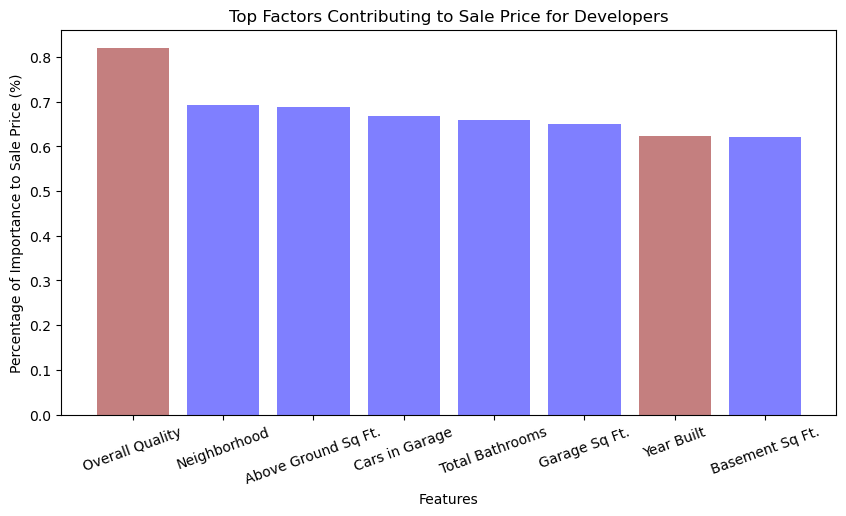

In [639]:
fig = plt.figure(figsize = (10, 5))
okay = plt.bar(features, percentages, align='center', alpha=0.5, color=['darkred', 'blue', 'blue', 'blue', 'blue'
                                                                        , 'blue', 'darkred', 'blue'])
plt.xticks(rotation = 20)
width = 0.35
plt.ylabel('Percentage of Importance to Sale Price (%)')
plt.xlabel('Features')
plt.title('Top Factors Contributing to Sale Price for Developers')

for p in okay:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')

plt.show()

# Top 5 materials that should be considered

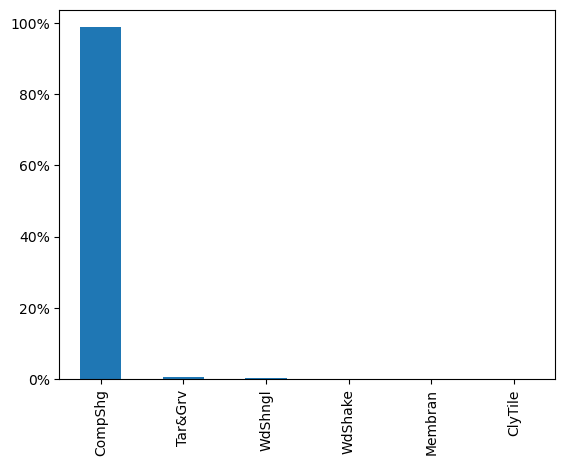

In [642]:
import matplotlib.ticker as mtick

roof_mats = train['roof_matl'].value_counts([0]).plot(kind='bar', stacked = True)
roof_mats.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

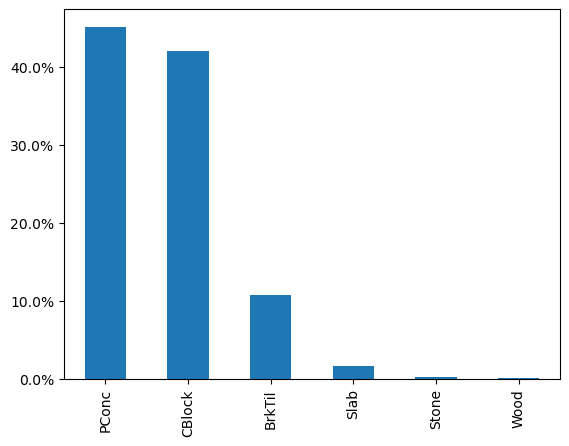

In [643]:
foundation = train['foundation'].value_counts([0]).plot(kind='bar', stacked = True)
foundation.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

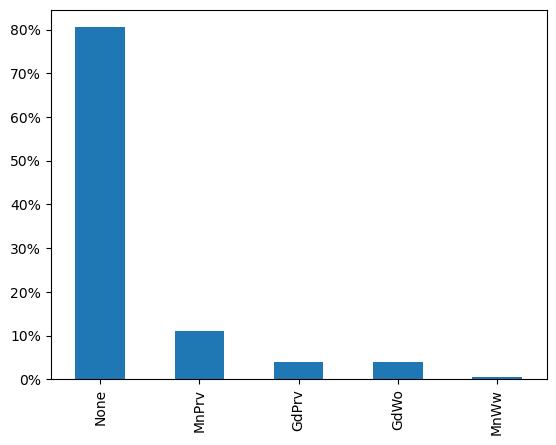

In [644]:
fence = train['fence'].value_counts([0]).plot(kind='bar', stacked = True)
fence.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

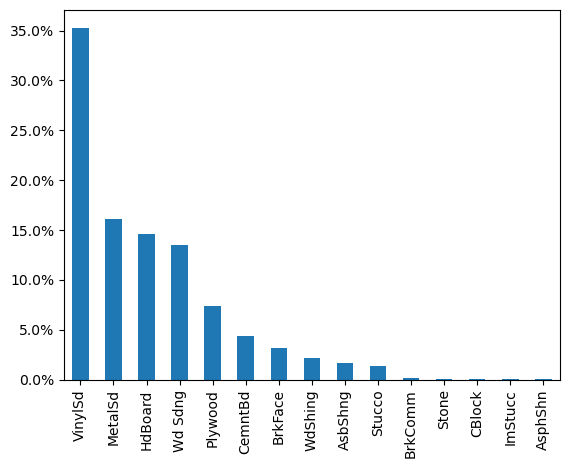

In [645]:
exterior_1st = train['exterior_1st'].value_counts([0]).plot(kind='bar', stacked = True)
exterior_1st.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

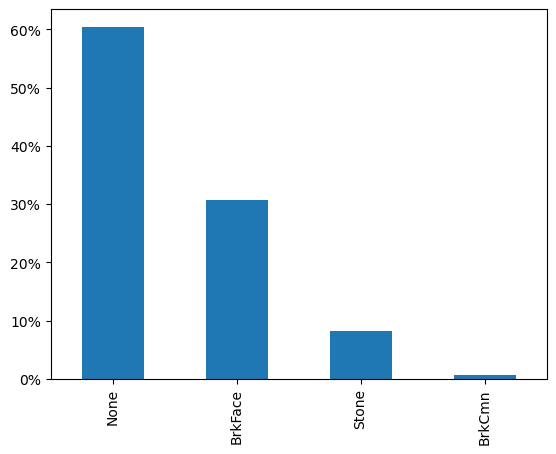

In [646]:
mas_vnr_type = train['mas_vnr_type'].value_counts([0]).plot(kind='bar', stacked = True)
mas_vnr_type.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

In [647]:
mat5 = {'Roof: Wood Shingles': 0.082396, 'Foundation: Concrete': 0.548406, 'No Fence': 0.169013,
        'External: Vinyl Siding': 0.363331, 'Masonry Vaneer Type: Brick Face': 0.282718}
mat5feat = list(mat5.keys())
mat5per = list(mat5.values())

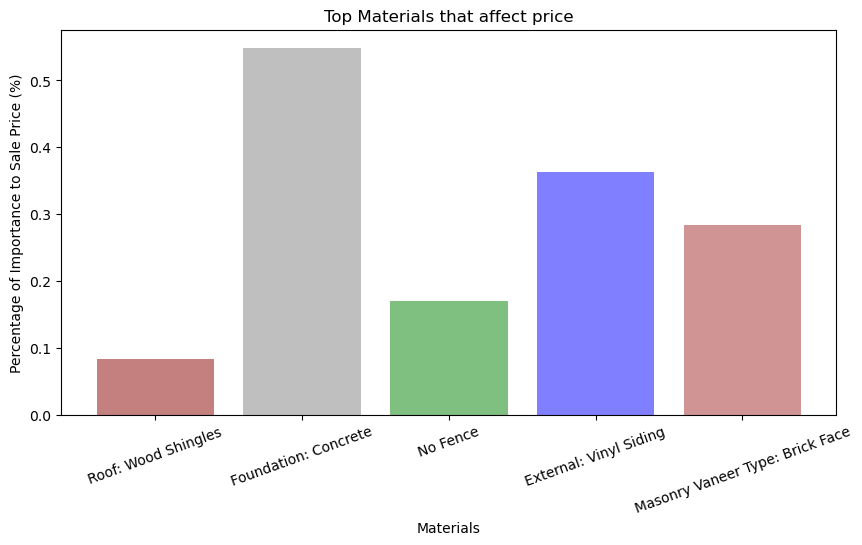

In [648]:
fig = plt.figure(figsize = (10, 5))
okay2 = plt.bar(mat5feat, mat5per, align='center', alpha=0.5, color=['darkred', 'grey', 'green', 'blue', 'brown'
                                                                        ])
plt.xticks(rotation = 20)
width = 0.35
plt.ylabel('Percentage of Importance to Sale Price (%)')
plt.xlabel('Materials')
plt.title('Top Materials that affect price')

for p in okay:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')

plt.show()

# Function to calculate Average Price of those with specific materials

In [649]:
def avg_price(column):
    # function takes in specific dummy column then takes mean of the price for all
    x = total_data_dummy.groupby(column)['saleprice'].mean()
    return x

In [650]:
# Average Square Foot of a home. 
avg_sqft = (total_data_dummy['1st_flr_sf'].mean() + total_data_dummy['garage_area'].mean())
avg_sqft

1638.1728912725498

In [651]:
avglot_sqft = total_data_dummy['lot_area'].mean()
avglot_sqft

10065.20819112628

In [652]:
avg_msn = total_data_dummy['mas_vnr_area'].mean()
avg_msn

100.48932228181376

# Concrete

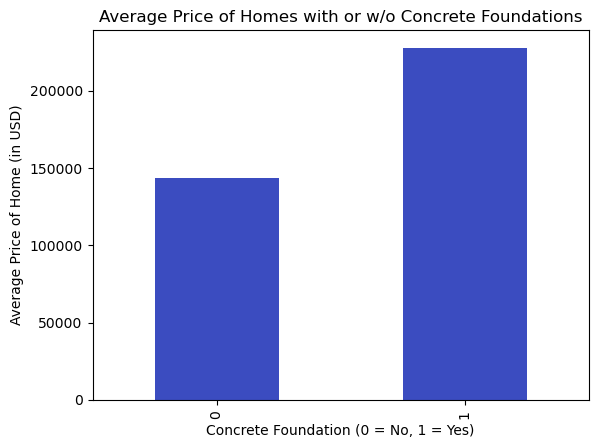

In [653]:
# Is using concrete worth it to build a home?
# Figure out average price of a home > 2000 sq ft with concrete vs without
conc_avg = avg_price('foundation_PConc').plot(kind='bar', 
                                              xlabel='Concrete Foundation (0 = No, 1 = Yes)',
                                              ylabel='Average Price of Home (in USD)',
                                              title= 'Average Price of Homes with or w/o Concrete Foundations',
                                              colormap='coolwarm')

# Figure out price of concrete per sq ft
# https://concrete.promatcher.com/cost/iowa.aspx
# Cost of Concrete Foundation Installation in Iowa
# $5.72 per square foot (4 inch reinforced slab on grade) (Range: $5.41 - $6.02)

# average square foot of a home 1638

In [654]:
avg_price('foundation_PConc')

foundation_PConc
0    143436.385778
1    227676.483801
Name: saleprice, dtype: float64

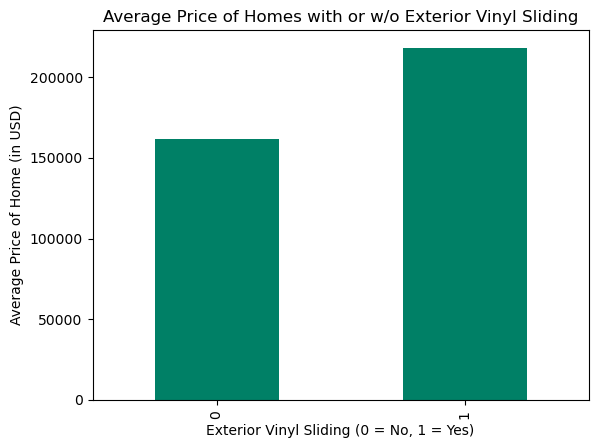

In [655]:

ex_1_vs = avg_price('exterior_1st_VinylSd').plot(kind='bar', 
                                              xlabel='Exterior Vinyl Sliding (0 = No, 1 = Yes)',
                                              ylabel='Average Price of Home (in USD)',
                                              title= 'Average Price of Homes with or w/o Exterior Vinyl Sliding',
                                              colormap='summer')



# Figure out price of concrete per sq ft
# https://concrete.promatcher.com/cost/iowa.aspx
# Cost of Concrete Foundation Installation in Iowa
# $5.72 per square foot (4 inch reinforced slab on grade) (Range: $5.41 - $6.02)

In [656]:
avg_price('exterior_1st_VinylSd')

exterior_1st_VinylSd
0    161444.100980
1    218174.082873
Name: saleprice, dtype: float64

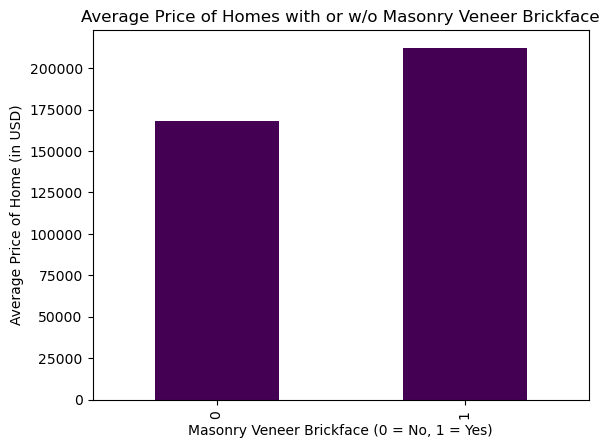

In [657]:

mas_vnr_brk = avg_price('mas_vnr_type_BrkFace').plot(kind='bar', 
                                              xlabel='Masonry Veneer Brickface (0 = No, 1 = Yes)',
                                              ylabel='Average Price of Home (in USD)',
                                              title= 'Average Price of Homes with or w/o Masonry Veneer Brickface',
                                              colormap='viridis')


# Figure out price of concrete per sq ft
# https://concrete.promatcher.com/cost/iowa.aspx
# Cost of Concrete Foundation Installation in Iowa
# $5.72 per square foot (4 inch reinforced slab on grade) (Range: $5.41 - $6.02)

In [658]:
avg_price('mas_vnr_type_BrkFace')

mas_vnr_type_BrkFace
0    167862.528501
1    212161.436508
Name: saleprice, dtype: float64

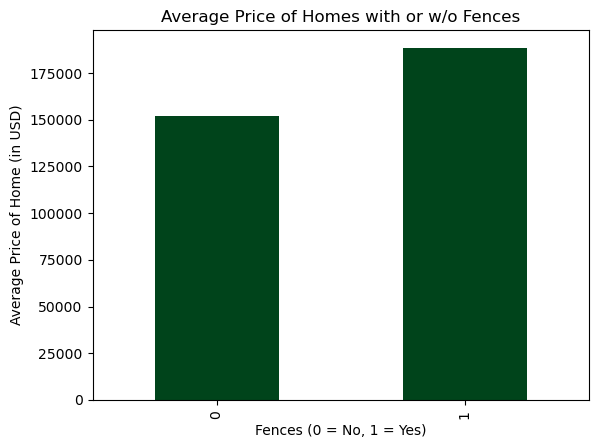

In [659]:

no_fence = avg_price('fence_None').plot(kind='bar', 
                                              xlabel='Fences (0 = No, 1 = Yes)',
                                              ylabel='Average Price of Home (in USD)',
                                              title= 'Average Price of Homes with or w/o Fences',
                                              colormap='Greens_r')


# Figure out price of concrete per sq ft
# https://concrete.promatcher.com/cost/iowa.aspx
# Cost of Concrete Foundation Installation in Iowa
# $5.72 per square foot (4 inch reinforced slab on grade) (Range: $5.41 - $6.02)

In [660]:
avg_price('fence_None')

fence_None
0    152209.525000
1    188558.781345
Name: saleprice, dtype: float64

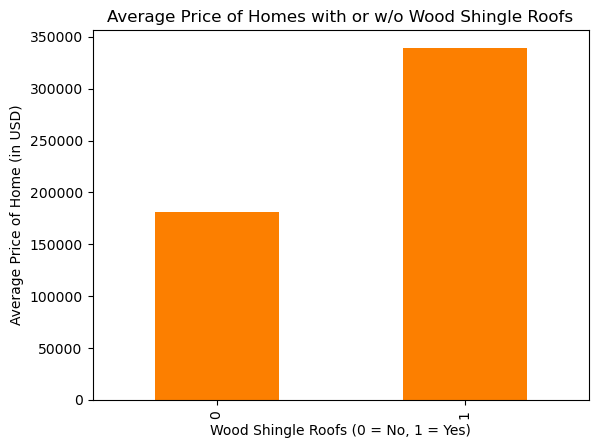

In [661]:

roof_mat = avg_price('roof_matl_WdShngl').plot(kind='bar', 
                                              xlabel='Wood Shingle Roofs (0 = No, 1 = Yes)',
                                              ylabel='Average Price of Home (in USD)',
                                              title= 'Average Price of Homes with or w/o Wood Shingle Roofs',
                                              colormap='Wistia_r')


# Figure out price of concrete per sq ft
# https://concrete.promatcher.com/cost/iowa.aspx
# Cost of Concrete Foundation Installation in Iowa
# $5.72 per square foot (4 inch reinforced slab on grade) (Range: $5.41 - $6.02)

In [662]:
avg_price('roof_matl_WdShngl')

roof_matl_WdShngl
0    181083.752688
1    339400.000000
Name: saleprice, dtype: float64

# Export

In [ ]:
final_submit = test_dummy[['id', 'SalePrice']]

In [ ]:
final_submit = final_submit.rename(columns = {'id': 'Id'})

In [ ]:
final_submit.set_index('Id', inplace = True)

In [ ]:
final_submit.to_csv('datasets/final_submission.csv', header=True)